CREATING A FOOTBALL MATCH WINNER PREDICTOR (EPL 2021-2022 SEASON)

In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches.csv


In [3]:
matches=pd.read_csv("matches.csv",index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [4]:
matches.shape

(1389, 27)

In [5]:
matches["team"].value_counts

<bound method IndexOpsMixin.value_counts of 1      Manchester City
2      Manchester City
3      Manchester City
4      Manchester City
6      Manchester City
            ...       
38    Sheffield United
39    Sheffield United
40    Sheffield United
41    Sheffield United
42    Sheffield United
Name: team, Length: 1389, dtype: object>

In [6]:
matches[matches["team"]=="Liverpool"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [7]:
matches["round"].value_counts()

,count
round,
Matchweek 1,39
Matchweek 2,39
Matchweek 3,39
Matchweek 4,39
Matchweek 5,39
Matchweek 6,39
Matchweek 7,39
Matchweek 8,39
Matchweek 9,39


CLEANING THE DATA


In [8]:
matches["date"]=pd.to_datetime(matches["date"])

In [9]:
matches.dtypes

,0
date,datetime64[ns]
time,object
comp,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64
opponent,object


CREATING BASIC PREDICTORS FOR ML

In [10]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes     #converting the string to category and then from category to numbers

In [11]:
matches     # venue_code=0 (if team away else 1)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0


In [12]:
matches["opp_code"]= matches["opponent"].astype("category").cat.codes

In [13]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14


In [14]:
matches["hour"]=matches["time"].str.replace(":.+","",regex=True).astype("int")    #converting the hour in the time to an integer using regular expression

In [15]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18


In [16]:
matches["day_code"]= matches["date"].dt.dayofweek

In [17]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16,6
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15,5
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12,5
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15,5
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2


In [18]:
matches["target"]= (matches["result"]== "W")    #win as 1, loss/draw as 0

In [19]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,False
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,True
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,True
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,True
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,False
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,False
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,True
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,False


In [20]:
matches["target"]= (matches["result"]== "W").astype("int")

In [21]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


CREATING THE INTIAL ML MODEL

In [22]:
from sklearn.ensemble import RandomForestClassifier     #random forest-picks up non-linearity in the data(for ex opp_code variation)

In [23]:
rf=RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [24]:
# Splitting the data

train=matches[matches["date"] < "2022-01-01"]
test=matches[matches["date"] > "2022-01-01"]


In [25]:
predictors=["venue_code","opp_code","hour","day_code"]

In [26]:
rf.fit(train[predictors], train["target"])    #train the model with predictors to obtain the target

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [27]:
preds= rf.predict(test[predictors])

In [28]:
# Determining accuracy of the model

from sklearn.metrics import accuracy_score

In [29]:
acc= accuracy_score(test["target"], preds)

In [30]:
acc

0.6123188405797102

In [31]:
# See where accuracy was high/low , create a dataframe
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [32]:
#Create a crosstab
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,141,31
1,76,28


In [33]:
#For better precision
from sklearn.metrics import precision_score

In [34]:
precision_score(test["target"], preds)

0.4745762711864407

In [35]:
grouped_matches=matches.groupby("team")

In [36]:
group= grouped_matches.get_group("Manchester City")

In [37]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-05-01,12:30,Premier League,Matchweek 34,Sat,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2021,Manchester City,0,6,12,5,1
56,2021-05-08,17:30,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Chelsea,...,0.0,0.0,1.0,2021,Manchester City,1,5,17,5,0
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,W,4.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,0,14,20,4,1
58,2021-05-18,19:00,Premier League,Matchweek 37,Tue,Away,L,2.0,3.0,Brighton,...,1.0,0.0,0.0,2021,Manchester City,0,3,19,1,0


In [38]:
# Compute rolling averages
def rolling_averages( group,cols,new_cols):
  group=group.sort_values("date")
  rolling_stats=group[cols].rolling(3,closed='left'). mean()
  group[new_cols]= rolling_stats
  group=group.dropna(subset=new_cols)
  return group

In [39]:
cols=["gf","ga","sh","sot","dist","fk","pk","pkatt"]
new_cols= [f"{c}_rolling" for c in cols]

In [40]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [41]:
rolling_averages(group,cols,new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


In [42]:
#Apply the function to each team
matches_rolling=matches.groupby("team").apply(lambda x:rolling_averages(x,cols,new_cols))

<ipython-input-42-160784b75ee6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling=matches.groupby("team").apply(lambda x:rolling_averages(x,cols,new_cols))


In [43]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [44]:
matches_rolling=matches_rolling.droplevel('team')

In [45]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [46]:
matches_rolling.index=range(matches_rolling.shape[0])

In [47]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


RETRAINING OUR ML MODEL

In [48]:
def make_predicitons(data,predictors):
  # Use the data argument instead of the original matches DataFrame to create train and test sets
  train=data[data["date"] < "2022-01-01"]
  test=data[data["date"] > "2022-01-01"]
  rf.fit(train[predictors], train["target"])
  preds= rf.predict(test[predictors])
  combined=pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
  precision=precision_score(test["target"], preds)
  return combined, precision

In [49]:
combined, precision= make_predicitons(matches_rolling,predictors + new_cols)

In [50]:
precision

0.625

In [51]:
combined

,actual,prediction
55,0,0
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


In [52]:
combined= combined.merge(matches_rolling[["date","team","opponent","result"]], left_index=True, right_index=True)

In [53]:
combined

,actual,prediction,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


COMBINING HOME AND AWAY RESULTS

In [54]:
# Normalize team names for consistency in the columns
class MissingDict(dict):
  __missing__= lambda self, key: key

map_values={
    "Brighton and Hove Albion":"Brighton",
    "Manchester United":"Manchester Utd",
    "Newcastle United":"Newcastle Utd",
    "Tottenham Hotspur":"Tottenham",
    "West Ham United":"West Ham",
    "Wolverhampton Wanderers":"Wolves"
}
mapping=MissingDict(**map_values)

In [55]:
mapping["Arsenal"]

'Arsenal'

In [56]:
mapping["West Ham United"]

'West Ham'

In [57]:
combined["new_team"]= combined["team"].map(mapping)

In [58]:
combined

,actual,prediction,date,team,opponent,result,new_team
55,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,1,2022-03-06,Arsenal,Watford,W,Arsenal
...,...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves


In [59]:
merged=combined.merge(combined, left_on=["date","new_team"], right_on=["date","opponent"])    #look for a new team field and merge with opponent on the other side

In [60]:
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [62]:
merged[(merged["prediction_x"] == 1 ) & (merged["prediction_y"]==0)]["actual_x"].value_counts()

,count
actual_x,
1,27
0,13


DATA VISUALIZATION:

In [67]:
import seaborn as sns

Example:

Let's say your confusion matrix shows the following values:

Predicted   0   1
Actual

   0  
           80  20
   
   1  
           30  70

This means:

80 matches were correctly predicted as losses or draws (TN).

20 matches were incorrectly predicted as wins when they were actually losses or draws (FP).

30 matches were incorrectly predicted as losses or draws when they were actually wins (FN).

70 matches were correctly predicted as wins (TP).

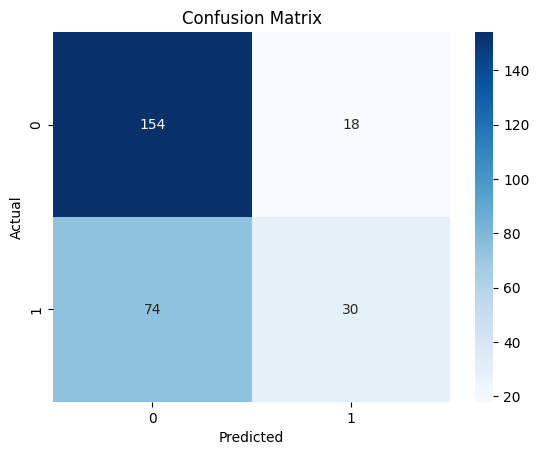

In [68]:
from sklearn.metrics import confusion_matrix

# Assuming 'combined' DataFrame has 'prediction' and 'actual' columns
cm = confusion_matrix(combined['actual'], combined['prediction'])

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#   TN FP
#   FN TP

Next steps: Scraping more data from more seasons for higher precision